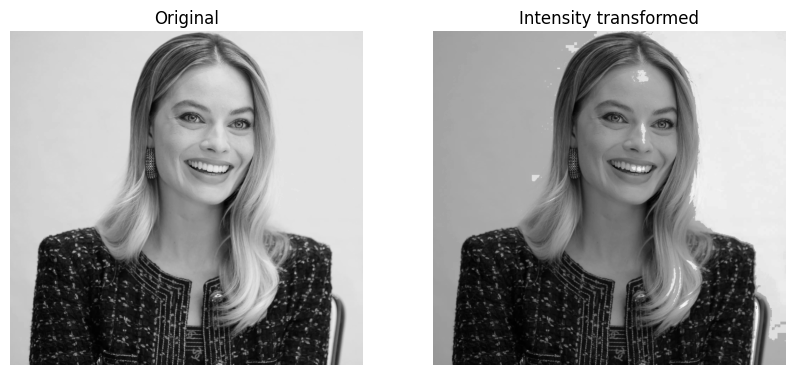

In [23]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img=cv.imread('margot_golden_gray.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None
img_np=np.array(img)

def intensity_transformation(intensity):    #intensity is parameter of intensity value of a pixel
    if intensity<=220:
        return int((175/220)*intensity)
    else:
        return int(175+((255-175)/(255-220))*(intensity-200))
    
vectorized_transf=np.vectorize(intensity_transformation)
img_transf=vectorized_transf(img_np)
transformed_image=Image.fromarray(np.uint8(img_transf))

fig,axes=plt.subplots(1,2,figsize=(10,10))
axes[0].imshow(img_np,cmap='gray',vmin=0,vmax=255)
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(transformed_image,cmap='gray',vmin=0,vmax=255)
axes[1].set_title('Intensity transformed')
axes[1].axis('off') 
plt.show()


   



<function matplotlib.pyplot.show(close=None, block=None)>

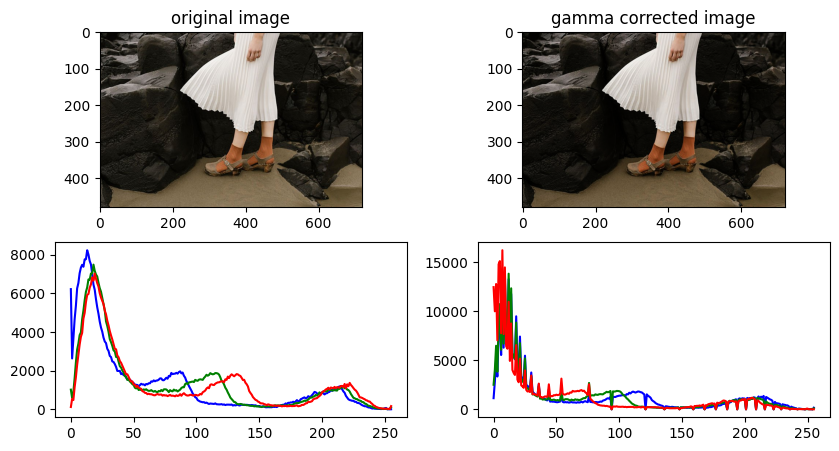

In [34]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread('highlights_and_shadows.jpg',cv.IMREAD_COLOR)
imgc=cv.cvtColor(img,cv.COLOR_BGR2RGB)

gamma=1.2
table=np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma=cv.LUT(img,table)
imgc=cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gamma=cv.cvtColor(img_gamma,cv.COLOR_BGR2RGB)

fig,axes=plt.subplots(2,2,figsize=(10,5))
axes[0,0].imshow(imgc)
axes[0,0].set_title('original image')
axes[0,1].imshow(img_gamma)
axes[0,1].set_title('gamma corrected image')
color=('b','g','r')
for i,c in enumerate(color):
    hist_orig=cv.calcHist([img],[i],None,[256],[0,256])
    axes[1,0].plot(hist_orig,color=c)
    hist_gamma=cv.calcHist([img_gamma],[i],None,[256],[0,256])
    axes[1,1].plot(hist_gamma,color=c)

plt.show


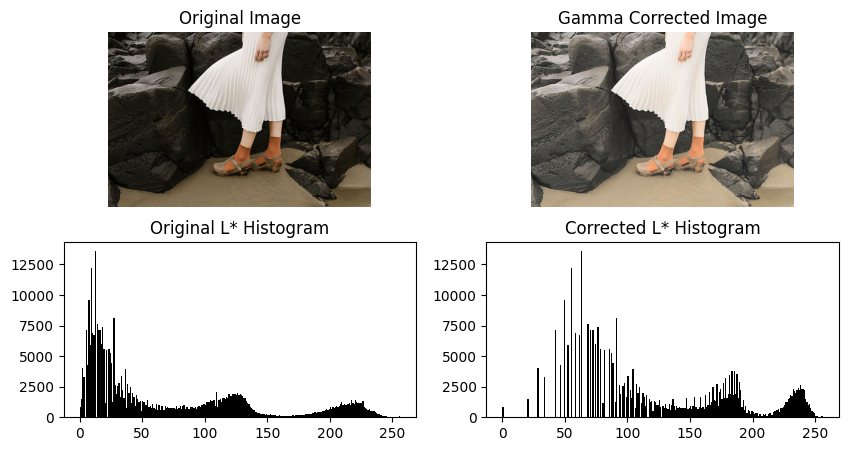

In [53]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(img, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(256)]).astype("uint8")
    return cv.LUT(img, table)

img = cv.imread('highlights_and_shadows.jpg')  
imgc = cv.cvtColor(img, cv.COLOR_BGR2RGB)

lab_image = cv.cvtColor(imgc, cv.COLOR_RGB2LAB)   
l_channel, a_channel, b_channel = cv.split(lab_image)

gamma = 2.2  
l_channel_corrected = gamma_correction(l_channel, gamma)

# Merge the corrected L* channel back with the a* and b* channels
lab_image_corrected = cv.merge((l_channel_corrected, a_channel, b_channel))

# Convert the corrected image back to RGB color space
image_corrected_rgb = cv.cvtColor(lab_image_corrected, cv.COLOR_LAB2RGB)

# Plot the original and gamma corrected images
fig, axes = plt.subplots(2, 2, figsize=(10,5))
axes[0, 0].imshow(imgc)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(image_corrected_rgb)
axes[0, 1].set_title('Gamma Corrected Image')
axes[0, 1].axis('off')

# Calculate and plot histograms for the original and corrected L* channels
axes[1, 0].hist(l_channel.ravel(), bins=256, range=[0, 256], color='black')
axes[1, 0].set_title('Original L* Histogram')

axes[1, 1].hist(l_channel_corrected.ravel(), bins=256, range=[0, 256], color='black')
axes[1, 1].set_title('Corrected L* Histogram')

plt.show()


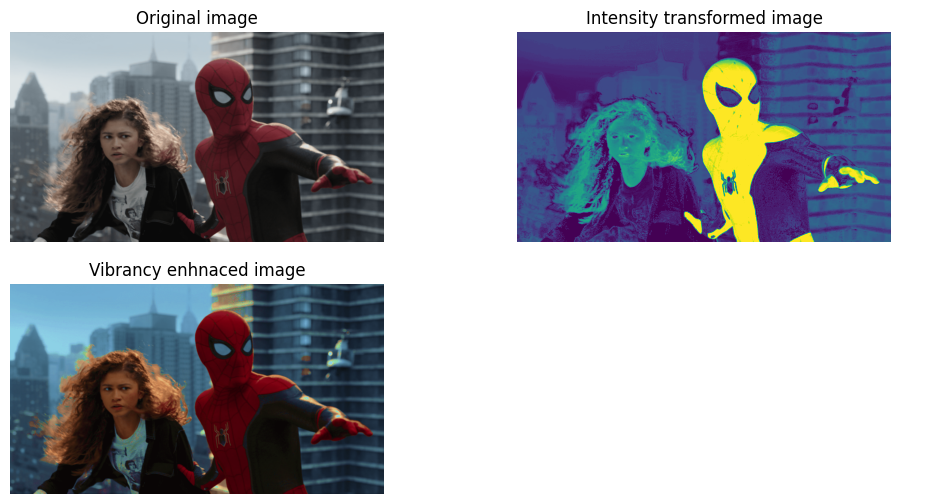

In [91]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def intensity_trans(x,a,sigma=70):
    return np.minimum(x+a*128*np.exp(-((x-128)**2/(2*sigma**2))),255)
    
img=cv.imread('spider.png',cv.IMREAD_COLOR)
imgc=cv.cvtColor(img,cv.COLOR_BGR2RGB)
hsv_img=cv.cvtColor(imgc,cv.COLOR_RGB2HSV)   #converting image into HSV plane
h_channel,s_channel,v_channel=cv.split(hsv_img)  #splitting into 3 planes

a=0.7
s_transformed=intensity_trans(s_channel,a).astype("uint8")

hsv_img_transformed=cv.merge((h_channel,s_transformed,v_channel))   #combining 3 hsv color planes
displaying_img=cv.cvtColor(hsv_img_transformed,cv.COLOR_HSV2RGB)

fig,axes=plt.subplots(2,2,figsize=(12,6))
axes[0,0].imshow(imgc)
axes[0,0].set_title('Original image')
axes[0,0].axis('off')
axes[0,1].imshow(s_transformed)
axes[0,1].set_title('Intensity transformed image')
axes[0,1].axis('off')
axes[1,0].imshow(displaying_img)
axes[1,0].set_title('Vibrancy enhnaced image')
axes[1,0].axis('off')
axes[1,1].axis('off')
plt.show()



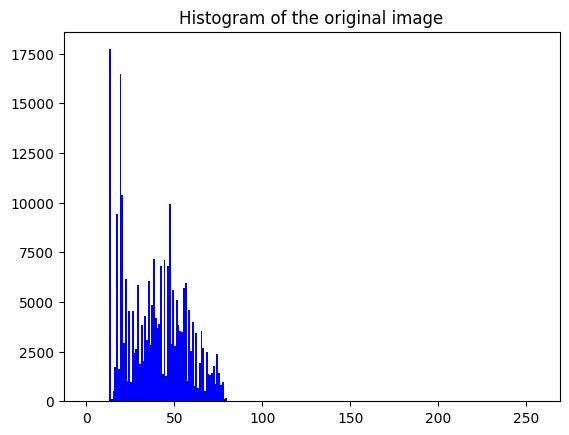

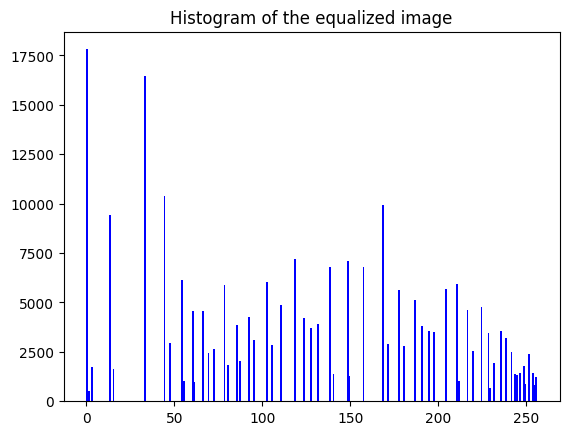

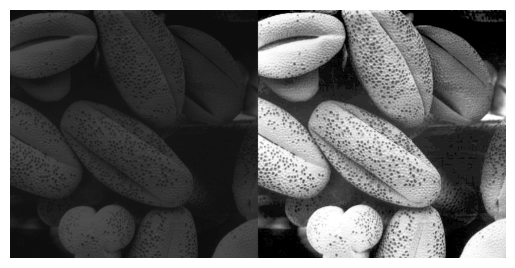

In [57]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread('shells.tif',cv.IMREAD_GRAYSCALE)
hist,bins=np.histogram(img.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()
plt.hist(img.flatten(),256,[0,256],color='b')
plt.title('Histogram of the original image')
plt.show()

equ=cv.equalizeHist(img)
hist,bins=np.histogram(equ.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()
plt.hist(equ.flatten(),256,[0,256],color='b')
plt.title('Histogram of the equalized image')
plt.show()

res=np.hstack((img,equ))
plt.axis('off')
plt.imshow(res,cmap='gray')









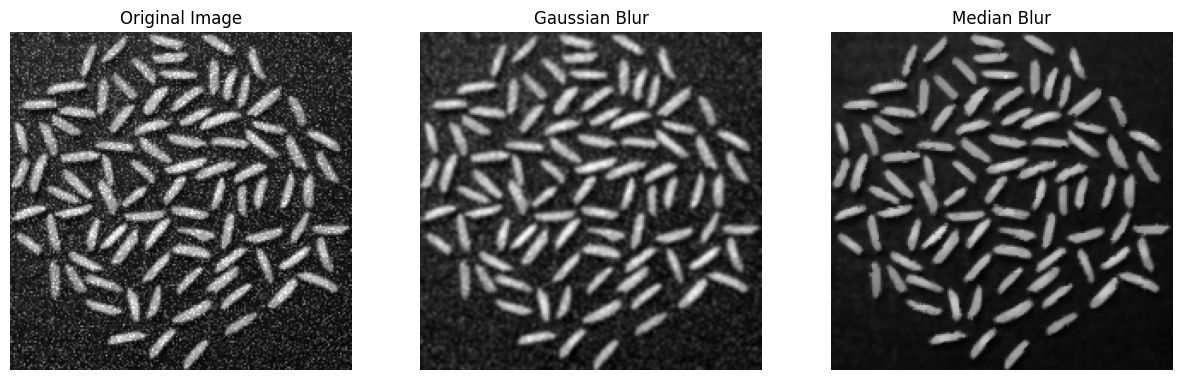

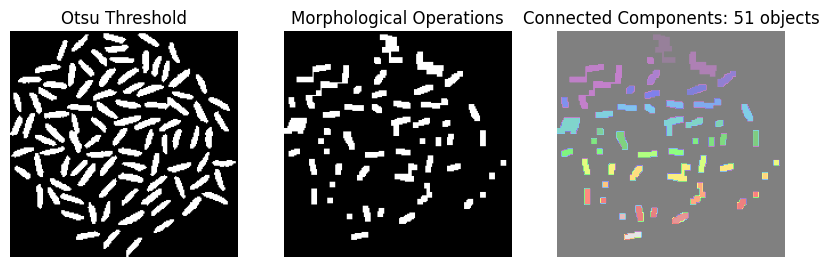

In [61]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('rice_gaussian_noise.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('rice_salt_pepper_noise.png' , cv.IMREAD_GRAYSCALE)
k=3
gaussian_blur = cv.GaussianBlur(img, (k, k), 0)
median_blur = cv.medianBlur(img2, k)

plt.subplots(1, 3, figsize=(15, 5))
plt.subplot(1, 3, 1),plt.imshow(img, cmap='gray'),plt.title("Original Image"),plt.axis('off')
plt.subplot(1, 3, 2),plt.imshow(gaussian_blur, cmap='gray'),plt.title("Gaussian Blur"),plt.axis('off')
plt.subplot(1, 3, 3),plt.imshow(median_blur, cmap='gray'),plt.title("Median Blur"),plt.axis('off')
plt.show()

img_for_segmentation = gaussian_blur
_, otsu_img = cv.threshold(img_for_segmentation, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
morph_open = cv.morphologyEx(otsu_img, cv.MORPH_OPEN, kernel, iterations=2)
morph_close = cv.morphologyEx(morph_open, cv.MORPH_CLOSE, kernel, iterations=2)

num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(morph_close, connectivity=8)

plt.subplots(1,3,figsize=(10,5))
plt.subplot(1, 3, 1),plt.imshow(otsu_img, cmap='gray'),plt.title("Otsu Threshold"),plt.axis('off')
plt.subplot(1, 3, 2),plt.imshow(morph_close, cmap='gray'),plt.title("Morphological Operations"),plt.axis('off')
plt.subplot(1, 3, 3),plt.imshow(labels, cmap='nipy_spectral', alpha = 0.5),plt.title(f'Connected Components: {num_labels - 1} objects'),plt.axis('off')
plt.show()



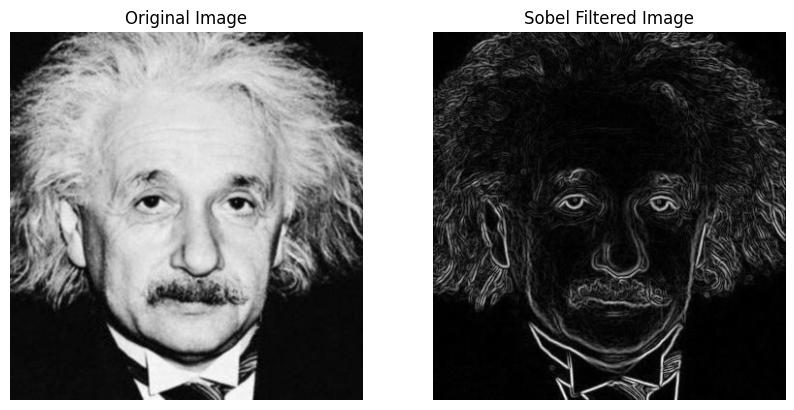

In [111]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)  
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])  #sobel kernel
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])  

sobel_filtered_x = cv.filter2D(img, -1, sobel_x)
sobel_filtered_y = cv.filter2D(img, -1, sobel_y)

sobel_filtered = cv.magnitude(sobelx, sobely)  #calculating magnitude gradient 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(sobel_filtered, cmap='gray')
axes[1].set_title('Sobel Filtered Image')
axes[1].axis('off')
plt.show()





Normalized SSD for Image 1 (Nearest-Neighbor): 31.284316486625514
Normalized SSD for Image 1 (Bilinear): 31.053094618055557
Normalized SSD for Image 2 (Nearest-Neighbor): 11.902013310185184
Normalized SSD for Image 2 (Bilinear): 10.682991753472223


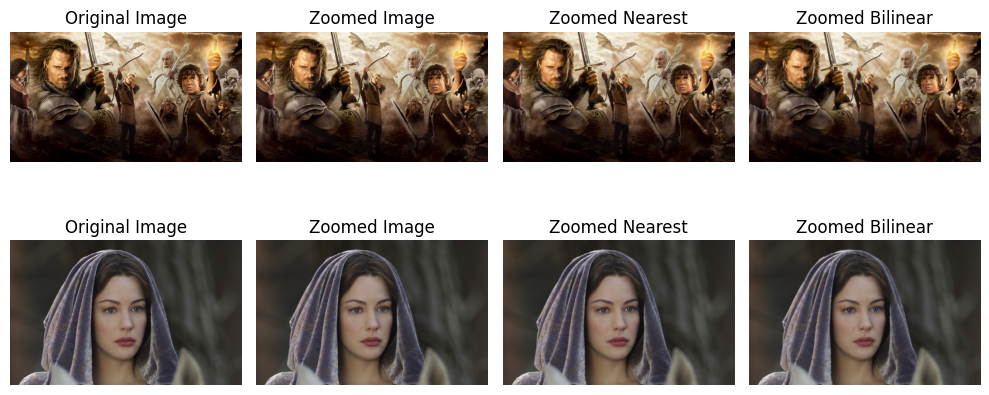

In [73]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def zoom_image(image, scale_factor, method='nearest'):
    original_height, original_width = image.shape[:2]
    new_height, new_width = int(original_height*scale_factor), int(original_width*scale_factor)

    if method == 'nearest':
        interpolation = cv.INTER_NEAREST
    elif method == 'bilinear':
        interpolation = cv.INTER_LINEAR
    else:
        raise ValueError("Method must be 'nearest' or 'bilinear'")
    zoomed_image = cv.resize(image, (new_width, new_height), interpolation=interpolation)
    return zoomed_image

def compute_normalized_ssd(original, zoomed):
    ssd = np.sum((original - zoomed) ** 2)
    normalized_ssd = ssd / float(original.size)
    return normalized_ssd

img1 = cv.imread('im01.png', cv.IMREAD_COLOR)
zoomed_img1 = cv.imread('im01small.png', cv.IMREAD_COLOR)
img2 = cv.imread('im02.png', cv.IMREAD_COLOR)
zoomed_img2 = cv.imread('im02small.png', cv.IMREAD_COLOR)

img1_rgb = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
zoomed_img1_rgb = cv.cvtColor(zoomed_img1, cv.COLOR_BGR2RGB)
img2_rgb = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
zoomed_img2_rgb = cv.cvtColor(zoomed_img2, cv.COLOR_BGR2RGB)

scale_factor = 4 #given scale factor

zoomed_nearest1 = zoom_image(zoomed_img1, scale_factor, method='nearest')
zoomed_bilinear1 = zoom_image(zoomed_img1, scale_factor, method='bilinear')
zoomed_nearest2 = zoom_image(zoomed_img2, scale_factor, method='nearest')
zoomed_bilinear2 = zoom_image(zoomed_img2, scale_factor, method='bilinear')

ssd_nearest1 = compute_normalized_ssd(img1, zoomed_nearest1)  #calculating sum of squared differences
ssd_bilinear1 = compute_normalized_ssd(img1, zoomed_bilinear1)
ssd_nearest2 = compute_normalized_ssd(img2, zoomed_nearest2)
ssd_bilinear2 = compute_normalized_ssd(img2, zoomed_bilinear2)

print(f"Normalized SSD for Image 1 (Nearest-Neighbor): {ssd_nearest1}")
print(f"Normalized SSD for Image 1 (Bilinear): {ssd_bilinear1}")
print(f"Normalized SSD for Image 2 (Nearest-Neighbor): {ssd_nearest2}")
print(f"Normalized SSD for Image 2 (Bilinear): {ssd_bilinear2}")

plt.figure(figsize=(10,5))
plt.subplot(2,4,1),plt.imshow(img1_rgb),plt.title('Original Image'),plt.axis('off')
plt.subplot(2,4,2),plt.imshow(zoomed_img1_rgb),plt.title('Zoomed Image'),plt.axis('off')
plt.subplot(2,4,3),plt.imshow(cv.cvtColor(zoomed_nearest1, cv.COLOR_BGR2RGB)),plt.title('Zoomed Nearest'),plt.axis('off')
plt.subplot(2,4,4),plt.imshow(cv.cvtColor(zoomed_bilinear1, cv.COLOR_BGR2RGB)),plt.title('Zoomed Bilinear'),plt.axis('off')
plt.subplot(2,4,5),plt.imshow(img2_rgb),plt.title('Original Image'),plt.axis('off')
plt.subplot(2,4,6),plt.imshow(zoomed_img2_rgb),plt.title('Zoomed Image'),plt.axis('off')
plt.subplot(2,4,7),plt.imshow(cv.cvtColor(zoomed_nearest2, cv.COLOR_BGR2RGB)),plt.title('Zoomed Nearest'),plt.axis('off')
plt.subplot(2,4,8),plt.imshow(cv.cvtColor(zoomed_bilinear2, cv.COLOR_BGR2RGB)),plt.title('Zoomed Bilinear'),plt.axis('off')
plt.tight_layout()
plt.show()



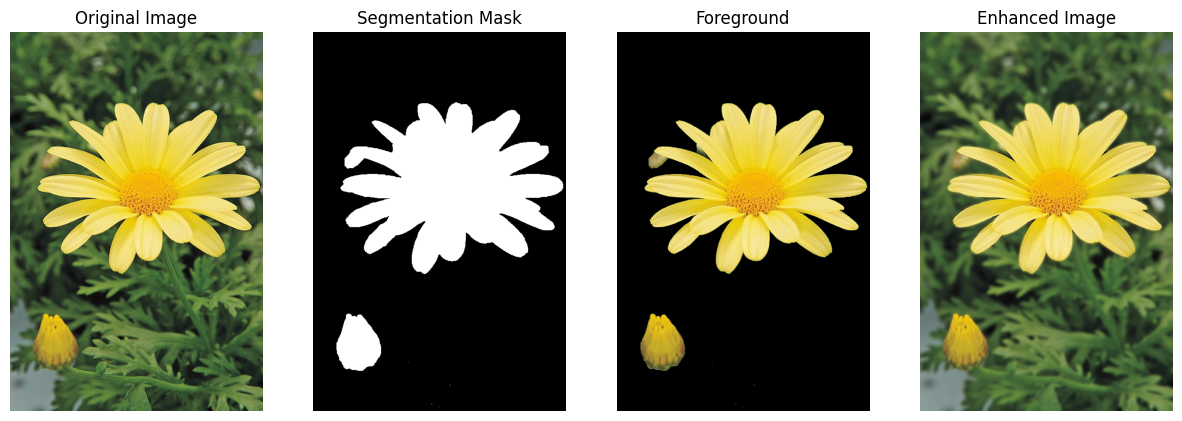

In [113]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread('daisy.jpg',cv.IMREAD_COLOR)
imgc=cv.cvtColor(img,cv.COLOR_BGR2RGB)

mask=np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
rect = (50, 50, img.shape[1]-50, img.shape[0]-50)

cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)  #applying grabcut 
mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')  #masking

foreground = img * mask2[:,:,np.newaxis]
background_mask = 1 - mask2
blurred_background = cv.GaussianBlur(img, (15,15), 0)
enhanced_image = foreground + (blurred_background * background_mask[:,:,np.newaxis])

plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(imgc)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(mask2, cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB))
plt.title('Enhanced Image')
plt.axis('off')
plt.show()

